In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import sklearn, sklearn.tree, sklearn.model_selection, sklearn.ensemble

ftcount = 531

datafile = 'Dataset/dataset.train'
data = list(csv.reader(open(datafile), delimiter=' '))

In [2]:
# Get number of individuals
len(data)

373

In [3]:
train = np.zeros((len(data),ftcount))

# converts "15:1" to row[15] = 1
idx = 0
for row in data:
    current = train[idx]
    current[ftcount-1] = int(row[0])
    for elt in row[1:]:
        split = elt.split(':')
        if (len(split) == 2):
            ftnum = int(split[0])
            if (ftnum <= len(current)-1):
                current[ftnum] = int(split[1])
    idx = idx + 1

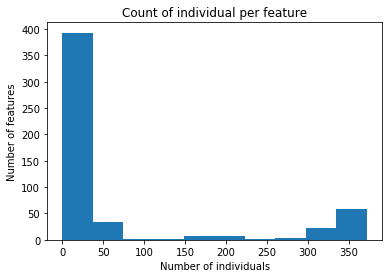

In [4]:
# Count of individuals in each feature
plt.hist(train.sum(axis=0))
plt.title("Count of individual per feature")
plt.ylabel("Number of features")
plt.xlabel("Number of individuals")
plt.show()

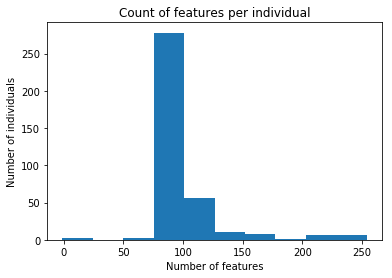

In [5]:
# Count of features for each individual
plt.hist(train.sum(axis=1))
plt.title("Count of features per individual")
plt.xlabel("Number of features")
plt.ylabel("Number of individuals")
plt.show()

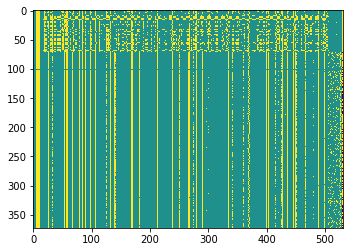

In [6]:
plt.imshow(train)

In [42]:
print(train.shape)
mask = np.zeros_like(train)
mask[:] = 1
empty_columns = train.any(axis=0)
mask[:, empty_columns] = 0
trainm = np.ma.masked_array(train, mask)
trainm

(373, 531)


masked_array(
  data=[[--, 1.0, --, ..., 0.0, 0.0, 1.0],
        [--, 1.0, --, ..., 0.0, 0.0, 1.0],
        [--, 1.0, --, ..., 0.0, 0.0, 1.0],
        ...,
        [--, 1.0, --, ..., 0.0, 0.0, 1.0],
        [--, 1.0, --, ..., 0.0, 0.0, 1.0],
        [--, 1.0, --, ..., 0.0, 0.0, -1.0]],
  mask=[[ True, False,  True, ..., False, False, False],
        [ True, False,  True, ..., False, False, False],
        [ True, False,  True, ..., False, False, False],
        ...,
        [ True, False,  True, ..., False, False, False],
        [ True, False,  True, ..., False, False, False],
        [ True, False,  True, ..., False, False, False]],
  fill_value=1e+20)

In [50]:
test_size=10
train_data, test_data = sklearn.model_selection.train_test_split(trainm, test_size=test_size)

In [51]:
clf = sklearn.tree.DecisionTreeClassifier()
clf.fit(train_data[:,:-1],train_data[:,-1])
res = clf.predict(test_data[:,:-1])
precision = 1-sum([abs(i)/2 for i in (res - test_data[:,-1])])/test_size

In [52]:
precision

0.6

In [192]:
cv_dt = sklearn.model_selection.cross_val_score(clf, trainm[:,:-1], trainm[:,-1], cv=10)
np.average(cv_dt)

0.7854591433538802

In [202]:
rf = sklearn.ensemble.RandomForestClassifier(n_estimators=50)

In [208]:
cv_rf = sklearn.model_selection.cross_val_score(rf, trainm[:,:-1], trainm[:,-1], cv=8)
np.average(cv_rf)

0.8042900092506938